In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\darvarir\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the datasets
gb_with_pca = pd.read_csv('../../data/performance_comparison/gradient_boosting_performance_withPCA.csv')
gb_without_pca = pd.read_csv('../../data/performance_comparison/gradient_boosting_performance_withoutPCA.csv')
nn_with_pca = pd.read_csv('../../data/performance_comparison/neural_network_performance_withPCA.csv')
nn_without_pca = pd.read_csv('../../data/performance_comparison/neural_network_performance_withoutPCA.csv')
rf_with_pca = pd.read_csv('../../data/performance_comparison/random_forest_performance_withPCA.csv')
rf_without_pca = pd.read_csv('../../data/performance_comparison/random_forest_performance_withoutPCA.csv')

# Adding model and scenario labels
gb_with_pca['Model'], gb_with_pca['Scenario'] = 'Gradient Boosting', 'With PCA'
gb_without_pca['Model'], gb_without_pca['Scenario'] = 'Gradient Boosting', 'Without PCA'
nn_with_pca['Model'], nn_with_pca['Scenario'] = 'Neural Network', 'With PCA'
nn_without_pca['Model'], nn_without_pca['Scenario'] = 'Neural Network', 'Without PCA'
rf_with_pca['Model'], rf_with_pca['Scenario'] = 'Random Forest', 'With PCA'
rf_without_pca['Model'], rf_without_pca['Scenario'] = 'Random Forest', 'Without PCA'

# Combine all dataframes into one
all_data = pd.concat([gb_with_pca, gb_without_pca, nn_with_pca, nn_without_pca, rf_with_pca, rf_without_pca])

# Here, let's assume that each file has a similar structure and the same metrics
all_data = all_data[['Model', 'Scenario', 'MSE', 'R2', 'MAE', 'RMSE', 'Explained Variance']]

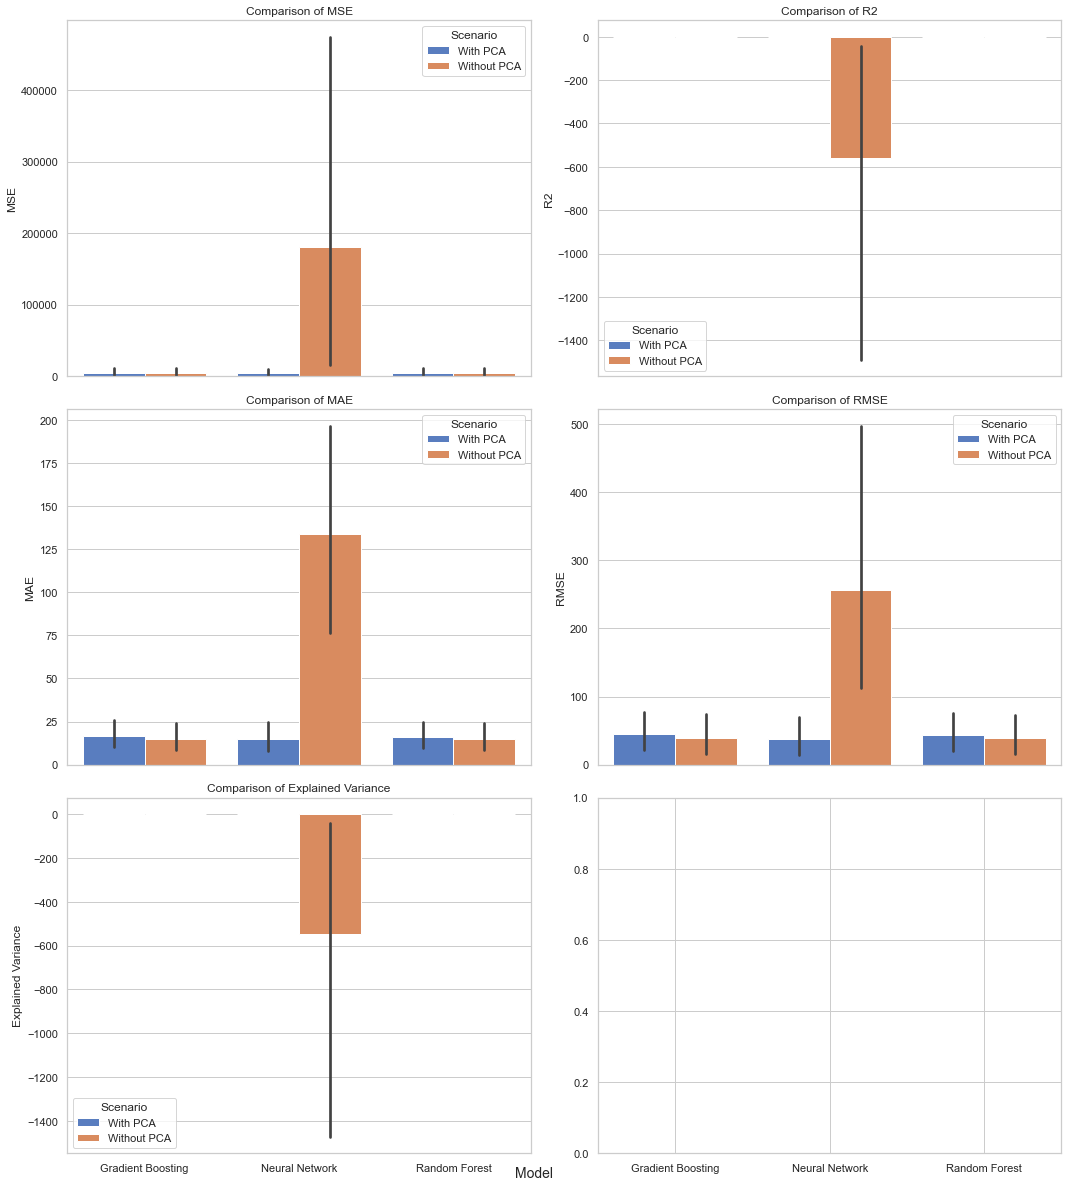

In [4]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a larger figure to hold all subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 18), sharex=True)  # Adjust as per the number of metrics
metrics = ['MSE', 'R2', 'MAE', 'RMSE', 'Explained Variance']

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]  # Determines the position of the subplot
    sns.barplot(x='Model', y=metric, hue='Scenario', data=all_data, ax=ax, palette="muted")
    ax.set_title(f'Comparison of {metric}')
    ax.set_xlabel('')
    ax.set_ylabel(metric)
    ax.legend(title='Scenario')

# Add common X label
fig.text(0.5, 0.04, 'Model', ha='center', va='center', fontsize=14)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()